In [6]:
import pandas as pd

In [7]:
# (1) Используя параметры pandas прочитать красиво пандас 
df = pd.read_csv('UCI_Credit_Card.csv') #TODO



In [8]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [10]:
# (2) выведите, что за типы переменных, сколько пропусков,
# для численных значений посчитайте пару статистик (в свободной форме)
print('\n')
df.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [9]:
count=0
for col in df.columns:
    if df[col].isnull().any():
        count+=1
if count == 0 :
    print('пропущенных данных нет')
else:
    print('кол-во метрик с пропущенными значениям - ',[col for col in df.columns if df[col].isnull().any()])

print('Стандартное отклонение метрики PAY_2 -',df['PAY_2'].std())

в дата фрейме нет пропущенных данных
Стандартное отклонение метрики PAY_2 - 1.19718597303439


In [11]:
# (3) посчитать число женщин с университетским образованием
# SEX (1 = male; 2 = female). 
# EDUCATION (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

df[(df['EDUCATION']==2)  & (df['SEX']==2)]['EDUCATION'].count()

8656

In [ ]:
# (4) Сгрупировать по "default payment next month" и посчитать медиану для всех показателей начинающихся на BILL_ и PAY_


In [12]:
arr_4=[]
for i in df.columns:
    if 'BILL_' in i or  'PAY_' in i:
        arr_4.append(i)
arr_4.append('default.payment.next.month')

df[arr_4].groupby('default.payment.next.month').median()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default.payment.next.month,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,23119.5,21660.5,20202.5,19000.0,17998.0,16679.0,2459.5,2247.5,2000.0,1734.0,1765.0,1706.0
1,1,0,0,0,0,0,20185.0,20300.5,19834.5,19119.5,18478.5,18028.5,1636.0,1533.5,1222.0,1000.0,1000.0,1000.0


In [18]:
# (6) Создать новый строковый столбец в data frame-е, который:
# принимает значение A, если значение LIMIT_BAL <=10000
# принимает значение B, если значение LIMIT_BAL <=100000 и >10000
# принимает значение C, если значение LIMIT_BAL <=200000 и >100000
# принимает значение D, если значение LIMIT_BAL <=400000 и >200000
# принимает значение E, если значение LIMIT_BAL <=700000 и >400000
# принимает значение F, если значение LIMIT_BAL >700000

import numpy as np


conditions = [
    (df['LIMIT_BAL'] <= 10000),
    (df['LIMIT_BAL'] > 10000 ) & (df['LIMIT_BAL'] <= 100000),
    (df['LIMIT_BAL'] > 100000) & (df['LIMIT_BAL'] <= 200000),
    (df['LIMIT_BAL'] > 200000) & (df['LIMIT_BAL'] <= 400000),
    (df['LIMIT_BAL'] > 400000) & (df['LIMIT_BAL'] <= 700000),
    (df['LIMIT_BAL'] > 700000),
    ]

values = ['A', 'B', 'C', 'D','E','F']

df['new_feature'] = np.select(conditions, values)

In [19]:
%matplotlib inline

In [20]:
# (7) постироить распределение LIMIT_BAL (гистрограмму)

In [21]:
df #TODO

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,new_feature
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,B
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,C
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,B
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,B
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,D
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,C
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,B
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,B


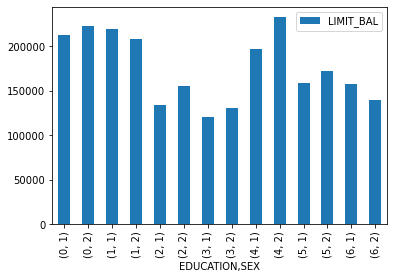

In [22]:
# (8) построить среднее значение кредитного лимита для каждого вида образования 
# и для каждого пола
# график необходимо сделать очень широким (на весь экран)
df[['LIMIT_BAL','EDUCATION','SEX']].groupby(['EDUCATION','SEX']).mean().plot.bar()

In [23]:
# (9) построить зависимость кредитного лимита и образования только для одного из полов

df_New = df[(['EDUCATION','SEX','LIMIT_BAL'])]

df_New[df_New['SEX']==1].corr()

,EDUCATION,SEX,LIMIT_BAL
EDUCATION,1.000000,NaN,-0.254474
SEX,NaN,NaN,NaN
LIMIT_BAL,-0.254474,NaN,1.000000


In [24]:
# (10) построить большой график (подсказка - используя seaborn) для построения завимисости всех возможных пар параметров
# разным цветом выделить разные значение "default payment next month"
# (но так как столбцов много - картинка может получиться "монструозной")
# (поэкспериментируйте над тем как построить подобное сравнение параметров)
# (подсказка - ответ может состоять из несколькольких графиков)
# (если не выйдет - программа минимум - построить один график со всеми параметрами)
import seaborn

#TODO